<a href="https://colab.research.google.com/github/MayarQasrawi/Artificial-Intelligent/blob/main/Image_Search_System_Using_Hugging_Face_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Search System Using Hugging Face Models

In [1]:
pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.2/255.2 kB 5.5 MB/s eta 0:00:00


In [2]:
pip install Pillow

In [3]:
pip install datasets


INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.1 MB/s eta 0:00:00


In [4]:
from PIL import Image

from datasets import load_dataset
from sentence_transformers import SentenceTransformer, util

# load dataset
load kaggle fashion-product-images-small dataset from hugging face

In [5]:
fashion = load_dataset(
    "ashraq/fashion-product-images-small",
    split="train"
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/867 [00:00<?, ?B/s]

(…)-00000-of-00002-6cff4c59f91661c3.parquet:   0%|          | 0.00/136M [00:00<?, ?B/s]

(…)-00001-of-00002-bb459e5ac5f01e71.parquet:   0%|          | 0.00/135M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/44072 [00:00<?, ? examples/s]

In [6]:
fashion[0:5]

{'id': [15970, 39386, 59263, 21379, 53759],
 'gender': ['Men', 'Men', 'Women', 'Men', 'Men'],
 'masterCategory': ['Apparel', 'Apparel', 'Accessories', 'Apparel', 'Apparel'],
 'subCategory': ['Topwear', 'Bottomwear', 'Watches', 'Bottomwear', 'Topwear'],
 'articleType': ['Shirts', 'Jeans', 'Watches', 'Track Pants', 'Tshirts'],
 'baseColour': ['Navy Blue', 'Blue', 'Silver', 'Black', 'Grey'],
 'season': ['Fall', 'Summer', 'Winter', 'Fall', 'Summer'],
 'year': [2011.0, 2012.0, 2016.0, 2011.0, 2012.0],
 'usage': ['Casual', 'Casual', 'Casual', 'Casual', 'Casual'],
 'productDisplayName': ['Turtle Check Men Navy Blue Shirt',
  'Peter England Men Party Blue Jeans',
  'Titan Women Silver Watch',
  'Manchester United Men Solid Black Track Pants',
  'Puma Men Grey T-shirt'],
 'image': [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80>,
  <PIL.Image.Image image mode=L size=60x80>,
  <PIL.JpegImagePlugin.JpegImageFile image 

In [7]:
fashion[1]

{'id': 39386,
 'gender': 'Men',
 'masterCategory': 'Apparel',
 'subCategory': 'Bottomwear',
 'articleType': 'Jeans',
 'baseColour': 'Blue',
 'season': 'Summer',
 'year': 2012.0,
 'usage': 'Casual',
 'productDisplayName': 'Peter England Men Party Blue Jeans',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80>}

In [8]:
fashion.features

{'id': Value(dtype='int64', id=None),
 'gender': Value(dtype='string', id=None),
 'masterCategory': Value(dtype='string', id=None),
 'subCategory': Value(dtype='string', id=None),
 'articleType': Value(dtype='string', id=None),
 'baseColour': Value(dtype='string', id=None),
 'season': Value(dtype='string', id=None),
 'year': Value(dtype='float64', id=None),
 'usage': Value(dtype='string', id=None),
 'productDisplayName': Value(dtype='string', id=None),
 'image': Image(mode=None, decode=True, id=None)}

  
#  pre-training proccessing for the loaded data
1.  extracts the "image" column from the fashion dataset and assigns it to the



images variable. This means images now contains a list or array of image data
2.   List itemremoves the "image" column from the fashion dataset itself. This is often done to separate the image data from other textual or numerical features that might be used for training or analysis.


3. converts the fashion dataset (which is likely a Hugging Face Dataset object) into a Pandas DataFrame. This allowing to work with the data in a more familiar tabular format, using Pandas's powerful data manipulation and analysis tools.

In [9]:
images = fashion["image"]
fashion=fashion.remove_columns("image")

fashion_frame=fashion.to_pandas()

# load clip-ViT-B-32
 loads the "clip-ViT-B-32" model from the SentenceTransformer library. This model is specifically designed for multimodal tasks, such as combining text and image information. It will be used to encode both text and image data into numerical representations (embeddings) that can be compared and analyzed.

In [10]:
model = SentenceTransformer('clip-ViT-B-32')

modules.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.91k [00:00<?, ?B/s]

0_CLIPModel/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

0_CLIPModel/special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

0_CLIPModel/preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

0_CLIPModel/config.json:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

0_CLIPModel/tokenizer_config.json:   0%|          | 0.00/604 [00:00<?, ?B/s]

0_CLIPModel/vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [34]:
product_number=0

text_embedding = model.encode([fashion_frame['productDisplayName'][product_number]])
image_embedding=model.encode(images[product_number])



In [33]:

# query="blue jeans"
# query_embedding = model.encode(query)
# cosine = util.cos_sim(image_embedding, query_embedding)
# cosine

# image_embeddings = model.encode([image for image in images])
# results = util.semantic_search(query_embedding, image_embeddings, top_k=10)[0]
# results

In [35]:
def img_search(query, k=10):
    query_embedding = model.encode([query])
    results = util.semantic_search(query_embedding, image_embeddings, top_k=k)[0]
    for r in results:
        display(images[r['corpus_id']])

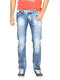

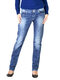

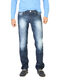

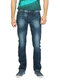

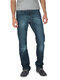

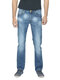

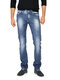

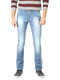

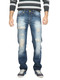

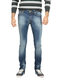

In [36]:
img_search("blue jeans")

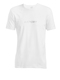

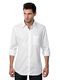

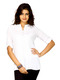

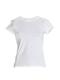

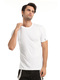

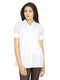

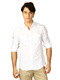

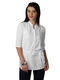

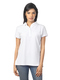

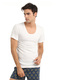

In [37]:
img_search('white shirt')

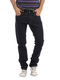

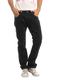

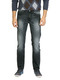

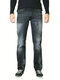

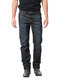

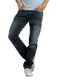

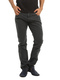

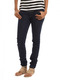

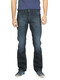

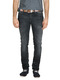

In [38]:
img_search("dark black man jeans")